# Introduction to Python - Assignment #3 (Pandas)
**Danilo III O. Gonzales** <br> 
MS Green Data Science

# **Exploring Microfinance Trends in the Philippines Using the Kiva Loans Dataset**

## Table of Contents
1. [About the Dataset](#about-the-dataset)
3. [Importing Libraries and CSV](#importing-libraries-and-csv)
4. [Question 1: Which regions in the Philippines have received the highest total loan amounts?](#question-1)
5. [Question 2: How has the total loan amount issued in the Philippines changed over the years?](#question-2)
6. [Question 3: What are the most common sectors and activities among Philippine borrowers?](#question-3)
7. [Question 4: Which sectors in the Philippines receive the highest funding efficiency]($question-4)
8. [Question 5: How do loan amounts differ between male, female, and mixed-gender borrower groups in the Philippines?](#question-5)
9. [Question 6: Which sectors in the Philippines have the shortest and longest times to funding and disbursement?](#question-6)
10. [References Used](#reference)

<a id="about-the-dataset"></a>
### About the Dataset

<p style="text-align: justify;">
  The <strong>Kiva Loans Dataset</strong> is a publicly available dataset from 
  <a href="https://www.kaggle.com/datasets/kiva/data-science-for-good-kiva-crowdfunding">
  Data Science for Good: Kiva Crowdfunding Challenge on Kaggle</a>. It contains detailed information about microloans facilitated by <a href="https://www.kiva.org/"> Kiva</a>, a nonprofit organization that connects lenders and borrowers worldwide to support small-scale entrepreneurship and poverty alleviation.
</p>

The dataset contains the following key features: <br>
|Column Name|Description|
|---|---|
|id|Unique ID for loan|
|funded_amount|The amount disbursed by Kiva to the field agent(USD)|
|loan_amount|The amount disbursed by the field agent to the borrower(USD)|
|activity|More granular category (e.g., farming, retail, education|
|sector|High level category (e.g., agriculture, services, food)|
|use|Exact usage of loan amount|
|country_code|ISO country code of country in which loan was disbursed|
|country|Full country name of country in which loan was disbursed|
|region|Full region name within the country|
|currency|The currency in which the loan was disbursed|
|partner_id|ID of Kiva's field partner managing the loan|
|posted_time|Date and time when the loan was first posted on the Kiva platform|
|disbursed_time|Date and time when the loan funds were disbursed to the borrower|
|funded_time|Date and time when the loan reached full funding|
|terms_in_months|Duration of the loan (in months)|
|lender_count|Number of lenders who contributed to the loan|
|tags|Keywords associated to the loan transaction|
|borrower_genders|Gender of borrowers|
|repayment_interval|Frequency of repayments (e.g., monthly, irregular)|

<a id="importing-libraries-and-csv"></a>
### Importing Libraries and CSV

This analysis uses `numpy` for numerical computing (NumPy Developers, n.d.), `pandas` for data manipulation (pandas Development Team, n.d.), and Matplotlib’s `pyplot` and `seaborn` for visualization (Matplotlib Developers, n.d.).

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load CSV to Data Frame (df)
df = pd.read_csv('kiva_loans.csv')
print(df)

             id  funded_amount  loan_amount             activity  \
0        653051          300.0        300.0  Fruits & Vegetables   
1        653053          575.0        575.0             Rickshaw   
2        653068          150.0        150.0       Transportation   
3        653063          200.0        200.0           Embroidery   
4        653084          400.0        400.0           Milk Sales   
...         ...            ...          ...                  ...   
671200  1340323            0.0         25.0            Livestock   
671201  1340316           25.0         25.0            Livestock   
671202  1340334            0.0         25.0                Games   
671203  1340338            0.0         25.0            Livestock   
671204  1340339            0.0         25.0            Livestock   

                sector                                                use  \
0                 Food            To buy seasonal, fresh fruits to sell.    
1       Transportation  to re

<a id="question-1"></a>
### **Question 1**: Which regions in the Philippines have received the highest total loan amounts?

<p style="text-align: justify;">
    Table 1 showed that the largest total loan amounts were concentrated in rural areas of the Philippines, particularly in the island province of Palawan in Luzon, specifically the municipalities of Quezon, Narra, and Brooke's Point. Significant loan activity was also observed in the Visayas region, including provinces of Negros Group of Islands, Cebu, and Capiz.
</p>

In [15]:
# Filter the rows for the Philippines using the country code and make a safe copy.
ph = df[df["country_code"].eq("PH")].copy()
# Filter the top 10 regions in the Philippines that have received the highest total loan amounts.
top10_regions = (
    ph.dropna(subset=["region"])                                   
      .groupby("region", as_index=False)["loan_amount"].sum()       
      .rename(columns={"loan_amount": "total_loan_amount_USD"})
      .sort_values("total_loan_amount_USD", ascending=False)
      .head(10)                                                    
)

# Format values with a comma and two decimal places.
top10_regions_formatted = top10_regions.copy()
top10_regions_formatted["total_loan_amount_USD"] = top10_regions_formatted["total_loan_amount_USD"].apply(lambda x: f"{x:,.2f}")

print("Table 1. Top 10 Regions with the Largest Loan Amount in USD")
top10_regions_formatted

Table 1. Top 10 Regions with the Largest Loan Amount in USD


,region,total_loan_amount_USD
2000,"Narra, Palawan","1,235,750.00"
2556,"Quezon, Palawan","1,211,875.00"
583,"Brookes Point, Palawan","1,181,175.00"
1381,"Kabankalan, Negros Occidental","1,045,225.00"
1282,"Hinigaran, Negros Occidental","967,900.00"
934,"Cordova, Cebu","925,850.00"
1306,"Isabela, Negros Occidental","896,900.00"
171,"Bais, Negros Oriental","844,775.00"
1150,"Dumaguete, Negros Oriental","819,950.00"
2630,"Roxas City, Capiz","752,100.00"


<a id="question-2"></a>
### **Question 2**: How has the total loan amount issued in the Philippines changed over time?

In [17]:
# Safe copy of the Philippine subset
ph_copy = ph.copy()

# Create the year_month column using the posted_time via pd.to_datetime()
ph_copy["year_month"] = pd.to_datetime(ph_copy["posted_time"]).dt.to_period("M")


# Compute total loan amount per month
monthly_ts = (
    ph_copy.groupby("year_month")["loan_amount"]
           .sum()
           .reset_index()
           .rename(columns={"loan_amount": "loan_amount_USD"})
)

# Convert period to timestamp for plotting
monthly_ts["year_month"] = monthly_ts["year_month"].dt.to_timestamp()

# Format year_month → "YYYY-Mm" (e.g., 2014-01)
monthly_ts["year_month"] = monthly_ts["year_month"].dt.strftime("%Y-%m")

# Format values with a comma and two decimal places on a safe copy
monthly_ts_formatted = (monthly_ts.copy()
    .assign(loan_amount_USD=lambda x: x["loan_amount_USD"]
    .apply(lambda v: f"{v:,.2f}"))
)

print("Table 2. Monthly Total loan Amounts in the Philippines (2014-2017)")
monthly_ts_formatted

Table 2. Monthly Total loan Amounts in the Philippines (2014-2017)


/var/folders/v5/zy13w8095ls3cgyqz08_43_40000gn/T/ipykernel_2792/374989241.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  ph_copy["year_month"] = pd.to_datetime(ph_copy["posted_time"]).dt.to_period("M")


,year_month,loan_amount_USD
0,2014-01,"678,725.00"
1,2014-02,"977,025.00"
2,2014-03,"809,525.00"
3,2014-04,"994,400.00"
4,2014-05,"1,195,675.00"
5,2014-06,"1,246,225.00"
6,2014-07,"1,197,750.00"
7,2014-08,"1,005,675.00"
8,2014-09,"1,323,725.00"
9,2014-10,"1,519,175.00"


<p style="text-align: justify;">
    Figure 2 shows the bar chart of the history of total loan amount issued in the Philippines over time. Based on the figure, the monthly loan amounts show noticeable month-to-month variability. However, the overall pattern indicates a consistent upward trend across the years. This suggests that while lending activity fluctuates seasonally, the overall volume of Kiva loans has increased over time.
</p>

#### Data Visualization for Q2

Figure 1. History of Total Loan Amount Issued in the Philippines Over Time in USD


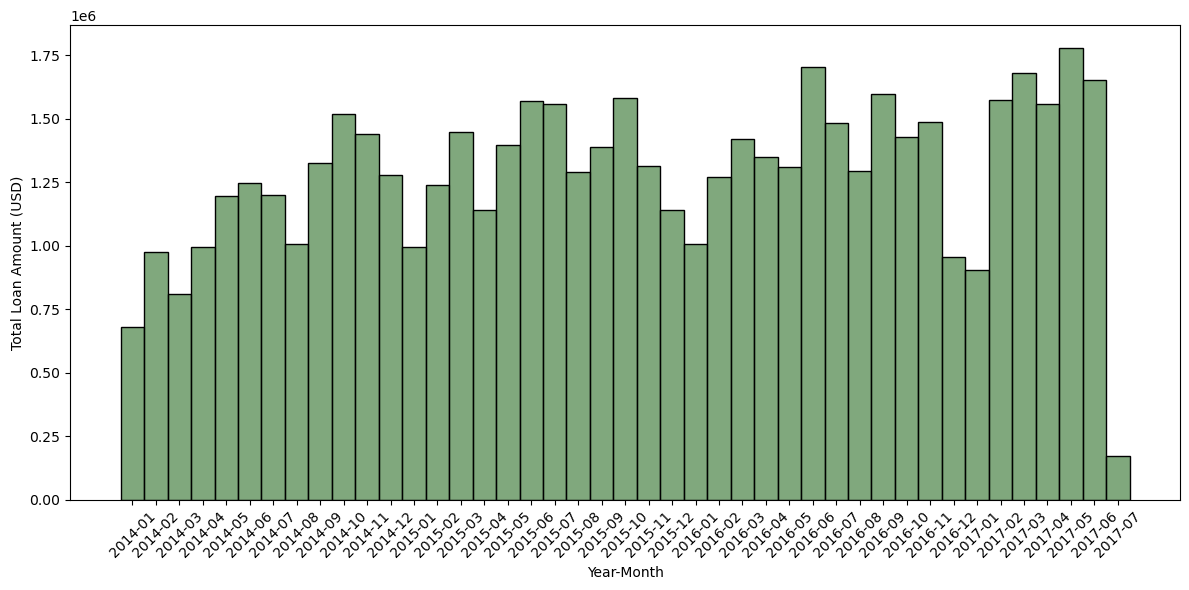

In [5]:
print("Figure 1. History of Total Loan Amount Issued in the Philippines Over Time in USD")
# Create a histogram to visualize the time series
plt.figure(figsize=(12, 6))
sns.histplot(
    data=monthly_ts,
    x="year_month",
    weights="loan_amount_USD",
    bins=len(monthly_ts),
    color="#558B52"
)

plt.xlabel("Year-Month")
plt.ylabel("Total Loan Amount (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a id="question-3"></a>
### **Question 3**: What are the most common sectors and activities among Philippine borrowers?

<p style="text-align: justify;">
    Tables 3 and 4 show that loan activity in the Philippines is in a few key sectors and livelihood activities. Retail, Food, and Agriculture emerge as the most common sectors, reflecting the prominence of small and medium enterprises among borrowers. At the activity level, general stores, or what we usually call sari-sari stores, pig raising and agriculture, as well as fisheries, dominate. The distribution of the loan sectors showed the common income-generating activities across rural areas.
</p>

In [18]:
# Safe copy of PH subset
ph_copy = ph.copy()

# Count top sectors
top_sectors = (
    ph_copy.groupby("sector")
           .size()
           .reset_index(name="count")
           .sort_values("count", ascending=False)
           .head(5)
)

# Count top activities
top_activities = (
    ph_copy.groupby("activity")
           .size()
           .reset_index(name="count")
           .sort_values("count", ascending=False)
           .head(5)
)

# Format values with a comma and two decimal places on a safe copy
top_sectors_fmt = top_sectors.copy()
top_sectors_fmt["count"] = top_sectors_fmt["count"].apply(lambda x: f"{x:,}")

top_activities_fmt = top_activities.copy()
top_activities_fmt["count"] = top_activities_fmt["count"].apply(lambda x: f"{x:,}")

print("Table 3. Top Loan Sectors in the Philippines")
top_sectors_fmt

Table 3. Top Loan Sectors in the Philippines


,sector,count
11,Retail,"53,581"
6,Food,"42,700"
0,Agriculture,"36,776"
8,Housing,"6,785"
13,Transportation,"4,568"


In [19]:
print("Table 4. Top Loan Sectors in the Philippines")
top_activities_fmt

Table 4. Top Loan Sectors in the Philippines


,activity,count
63,General Store,"42,960"
109,Pigs,"19,985"
49,Farming,"11,924"
50,Fish Selling,"9,060"
51,Fishing,"8,682"


<a id="question-4"></a> 
### **Question 4**: How do loan amounts differ across sectors in the Philippines?

In [37]:
# Safe copy of Philippine loans
ph_copy = ph.copy()

# Compute descriptive statistics of loan_amount by sector
sector_loan_stats = (
    ph_copy.groupby("sector")["loan_amount"]
           .agg(
               mean_loan_amount="mean",
               min_loan_amount="min",
               max_loan_amount="max",
               std_loan_amount="std"
           )
           .reset_index()
           .sort_values("mean_loan_amount", ascending=False)
)

# Format values with a comma and two decimal places on a safe copy
sector_loan_stats_fmt = sector_loan_stats.copy()

sector_loan_stats_fmt["mean_loan_amount"] = sector_loan_stats_fmt["mean_loan_amount"].apply(lambda x: f"{x:,.2f}")
sector_loan_stats_fmt["min_loan_amount"]  = sector_loan_stats_fmt["min_loan_amount"].apply(lambda x: f"{x:,.2f}")
sector_loan_stats_fmt["max_loan_amount"]  = sector_loan_stats_fmt["max_loan_amount"].apply(lambda x: f"{x:,.2f}")
sector_loan_stats_fmt["std_loan_amount"]  = sector_loan_stats_fmt["std_loan_amount"].apply(lambda x: f"{x:,.2f}")

<p style="text-align: justify;">
    Table 5 and Figure 3 demonstrate substantial variation in loan amounts across sectors. The Wholesale sector receives the highest average loan amounts, which reflects greater capital requirements, whereas sectors such as Arts, Housing, and Personal Use receive comparatively smaller loans. The error bars reveal that sectors including Education, Manufacturing, and Wholesale exhibit considerable variability in loan sizes, while other sectors display more consistent loan distributions. These findings indicate that funding requirements differ by sector and are influenced by the specific operational needs of each sector.
</p>

In [36]:
print("Table 5. Summary Statistics of Loan Amounts by Sector in the Philippines")
sector_loan_stats_fmt

Table 5. Summary Statistics of Loan Amounts by Sector in the Philippines


,sector,mean_loan_amount,min_loan_amount,max_loan_amount,std_loan_amount
14,Wholesale,683.78,100.00,"1,525.00",363.92
7,Health,459.79,50.00,"1,400.00",283.63
5,Entertainment,448.02,75.00,"1,150.00",234.25
3,Construction,420.02,75.00,"3,200.00",270.25
12,Services,410.49,50.00,"3,200.00",271.93
4,Education,405.14,50.00,"13,275.00",711.57
2,Clothing,394.20,50.00,"3,250.00",254.13
9,Manufacturing,378.93,50.00,"8,750.00",382.38
13,Transportation,370.09,50.00,"2,625.00",237.38
11,Retail,359.09,50.00,"3,450.00",213.97


#### Data Visualization for Q4

Figure 2. Boxplot of Loan Amounts by Sector in the Philippines


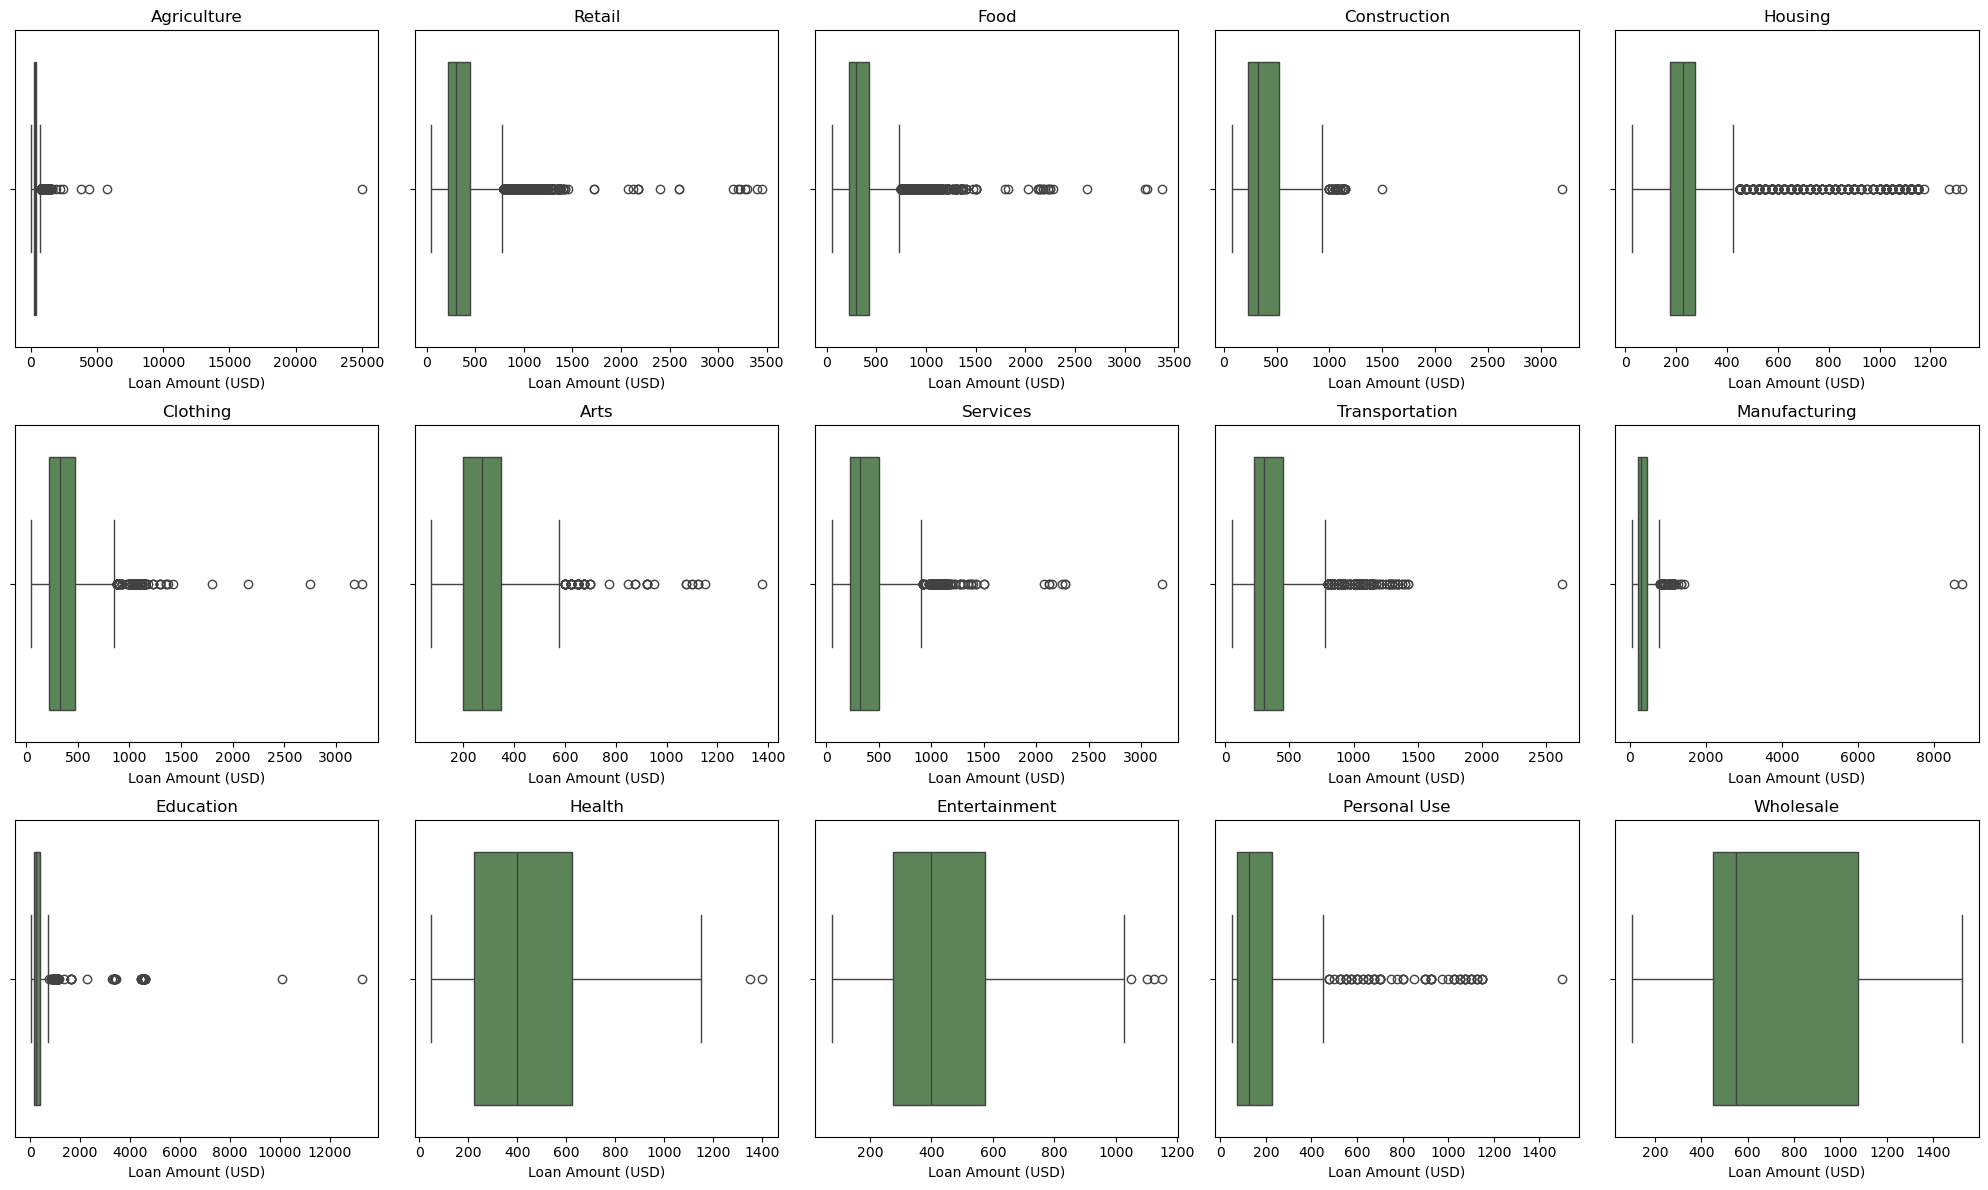

In [24]:
# Number of unique sectors
sectors = ph_copy["sector"].unique()
n_sectors = len(sectors)

# Create figure with 3 rows and 5 columns
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()

# Plot each sector in its own subplot
for i, sector in enumerate(sectors):
    ax = axes[i]
    sns.boxplot(
        data=ph_copy[ph_copy["sector"] == sector],
        x="loan_amount",
        ax=ax,
        color="#558B52"
    )
    ax.set_title(sector)
    ax.set_xlabel("Loan Amount (USD)")

# Hide any extra subplots if sectors < 15
for j in range(n_sectors, 15):
    fig.delaxes(axes[j])
print("Figure 2. Boxplot of Loan Amounts by Sector in the Philippines")
plt.tight_layout()
plt.show()

Figure 3. Error Bar Plot of Loan Amounts by Sector in the Philippines


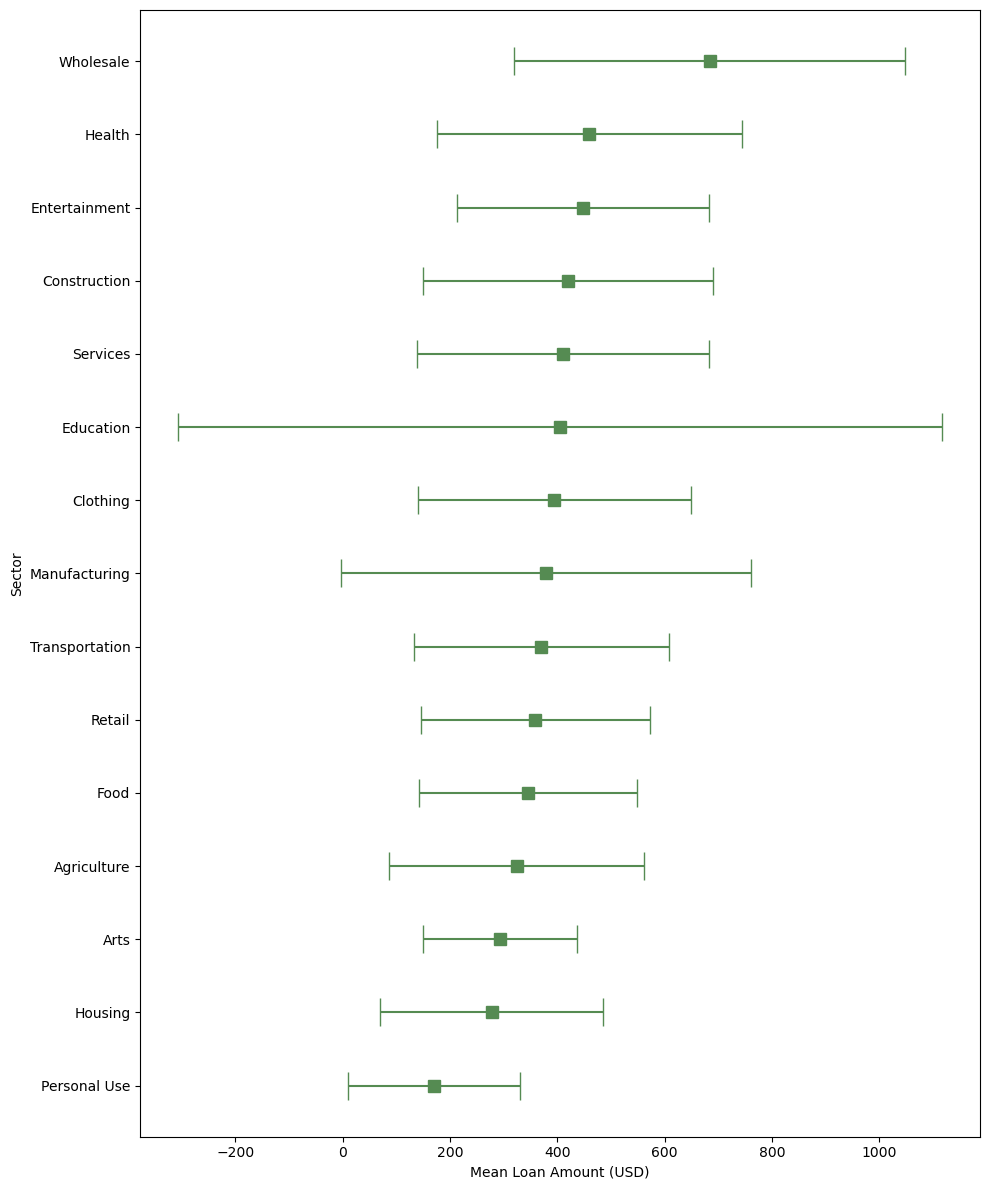

In [23]:
# Sort sectors by their mean loan amount in ascending order
sector_stats_sorted = sector_loan_stats.sort_values(
    "mean_loan_amount", ascending=True
)

# Create a figure for the error bar plot
plt.figure(figsize=(10, 12))

plt.errorbar(
    x=sector_stats_sorted["mean_loan_amount"],
    y=sector_stats_sorted["sector"],
    xerr=sector_stats_sorted["std_loan_amount"],
    fmt='s',
    markersize=8,
    ecolor="#558B52",
    capsize=10,
    color="#558B52"
)

plt.xlabel("Mean Loan Amount (USD)")
plt.ylabel("Sector")

print("Figure 3. Error Bar Plot of Loan Amounts by Sector in the Philippines")
plt.tight_layout()
plt.show()

<a id="question-5"></a> 
### **Question 5**: What are the top sectors with the highest number of borrowers, and what is the average loan amount in each of those sectors?

In [35]:
ph_copy = ph.copy()

# Clean and standardize gender text
ph_copy["gender_group"] = (
    ph_copy["borrower_genders"]
        .fillna("")
        .str.lower()
        .str.replace(" ", "")
)

# Classify into male / female / others
def classify_gender(g):
    if g == "":
        return "others"
    genders = set(g.split(","))
    if genders == {"female"}:
        return "female"
    elif genders == {"male"}:
        return "male"
    else:
        return "others"   # mixed, unknown, multiple genders

ph_copy["gender_group"] = ph_copy["gender_group"].apply(classify_gender)

# Compute total loans for percentage
total_loans = len(ph_copy)

# Compute stats
gender_stats = (
    ph_copy.groupby("gender_group")["loan_amount"]
           .agg(
               count="count",
               mean_loan="mean",
               min_loan="min",
               max_loan="max",
               std_loan="std"
           )
           .reset_index()
)

# Add percentage column
gender_stats["percentage"] = (gender_stats["count"] / total_loans) * 100

# Reorder columns
gender_stats = gender_stats[
    ["gender_group", "count", "percentage", "mean_loan", "min_loan", "max_loan", "std_loan"]
]

gender_stats_fmt = gender_stats.copy()

# Format numeric columns
for col in ["percentage", "mean_loan", "min_loan", "max_loan", "std_loan"]:
    gender_stats_fmt[col] = gender_stats_fmt[col].apply(lambda x: f"{x:,.2f}")

gender_stats_fmt["count"] = gender_stats_fmt["count"].apply(lambda x: f"{x:,}")




<p style="text-align: justify;">
Table 6 presents loan distribution and summary statistics by gender group for borrowers in the Philippines. Based on the table, female borrowers account for the vast majority of loan recipients, with more than 94 percent of all loans. Despite being fewer in number, male borrowers receive higher average loan amounts and exhibit greater variability, suggesting that their loan needs differ from those of female borrowers. Those categorized as others receive the highest average loan amount but represent a very small share of total borrowers. Overall, loan patterns vary across gender groups in both volume and loan size.
</p>

In [34]:
print("Table 6. Summary Statistics of Loan Amounts by Gender Group in the Philippines")
gender_stats_fmt

Table 6. Summary Statistics of Loan Amounts by Gender Group in the Philippines


,gender_group,count,percentage,mean_loan,min_loan,max_loan,std_loan
0,female,"151,984",94.73,339.76,25.00,"25,000.00",224.21
1,male,"8,377",5.22,437.29,50.00,"13,275.00",367.22
2,others,80,0.05,509.06,75.00,"1,275.00",295.94


<a id="question-6"></a> 
### **Question 6**: Which sectors in the Philippines have the shortest and longest times to funding and disbursement?

In [40]:
ph_copy = ph.copy()

# Convert timestamps
ph_copy["posted_time"] = pd.to_datetime(ph_copy["posted_time"], errors="coerce")
ph_copy["funded_time"] = pd.to_datetime(ph_copy["funded_time"], errors="coerce")
ph_copy["disbursed_time"] = pd.to_datetime(ph_copy["disbursed_time"], errors="coerce")

# Compute durations in days
ph_copy["time_to_fund"] = (ph_copy["funded_time"] - ph_copy["posted_time"]).dt.total_seconds() / 86400
ph_copy["time_to_disburse"] = (ph_copy["disbursed_time"] - ph_copy["funded_time"]).dt.total_seconds() / 86400

# Get the descriptive statistics using .describe()
funding_stats = (
    ph_copy["time_to_fund"]
        .describe()
        .to_frame()
        .rename(columns={"time_to_fund": "Funding Time (days)"})

)

<p style="text-align: justify;">
Table 7 presents summary statistics on loan funding time in the Philippines, indicating that loans take an average of 9.85 days to be fully funded. The distribution is skewed, with a very small minimum funding time (essentially same-day funding) and a maximum of about 62 days. The quartiles reveal that half of all loans are funded within 6.59 days, and 75% within 11.90 days, indicating that although some loans experience delays, most are funded within a relatively short period.
</p>

In [41]:
print("Table 7. Summary Statistics of Loan Funding Time in the Philippines (in Days)")
funding_stats

Table 7. Summary Statistics of Loan Funding Time in the Philippines (in Days)


,Funding Time (days)
count,157607.000000
mean,9.846077
std,9.031037
min,0.001389
25%,3.988287
50%,6.587882
75%,11.904485
max,62.232755


<p style="text-align: justify;">
Table 8, on the other hand, shows the summary statistics of loan disbursement time in the Philippines, where disbursement values appear negative because the field partner often disburses funds before the loan is fully funded on Kiva. On average, disbursement occurs 29 days earlier than the posted funding date. The spread is wide, ranging from approximately 92 days before to 41 days after full funding. The quartiles confirm this trend, with most disbursements occurring several weeks before the loan is officially funded on the platform, reflecting Kiva's partner-based disbursement model.
</p>

In [42]:
print("Table 8. Summary Statistics of Loan Disbursement Time in the Philippines (in Days)")
disbursement_stats = (
    ph_copy["time_to_disburse"]
        .describe()
        .to_frame()
        .rename(columns={"time_to_disburse": "Disbursement Time (days)"})
)

disbursement_stats

Table 8. Summary Statistics of Loan Disbursement Time in the Philippines (in Days)


,Disbursement Time (days)
count,157607.000000
mean,-28.922572
std,12.798540
min,-91.709421
25%,-35.912928
50%,-29.103194
75%,-19.772309
max,41.190405


<a id="reference"></a> 
### References Used


Kiva. (n.d.). How does Kiva fund its operations? Kiva Help Center. Retrieved December 12, 2023, from https://help.kiva.org/s/article/How-does-Kiva-fund-its-operations-1611075925497

Kiva. (n.d.). Kiva. Retrieved December 12, 2023, from https://www.kiva.org/

Matplotlib Development Team. (n.d.). Matplotlib documentation. https://matplotlib.org/stable/users/index

NumPy Developers. (n.d.). NumPy documentation. https://numpy.org/doc/

Pandas Development Team. (n.d.). Pandas documentation. https://pandas.pydata.org/docs/

Seaborn Development Team. (n.d.). Seaborn tutorial. https://seaborn.pydata.org/tutorial.html